# DEPRESSION ANALYSIS 

In [83]:
import pandas as pd
import seaborn as sns

In [84]:
df = pd.read_csv("dataset.csv")
df.head(5)

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [85]:
df['message'].iloc[:1]

0    just had a real good moment. i missssssssss hi...
Name: message, dtype: object

In [86]:
df.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

In [87]:
df = df.drop('Unnamed: 0',axis=1)

In [60]:
df

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [61]:
df.shape

(10314, 2)

### VISUALIZING THE DATA 

d:\depression-detection\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

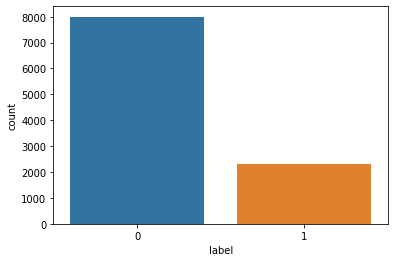

In [62]:
sns.countplot(df['label']) 

In [63]:
import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['message'][i])
    message = message.lower()
    message = message.split()
    message = [wo.lemmatize(word) for word in message ]
    message = ' '.join(message)
    corpus.append(message)

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [64]:
corpus[2]

'comeagainjen http twitpic com y lx http www youtube com watch v zogfqvh me'

### IMPORTING THE REQUIRED LIBRARIES FOR WORDS INITILIAZATION

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

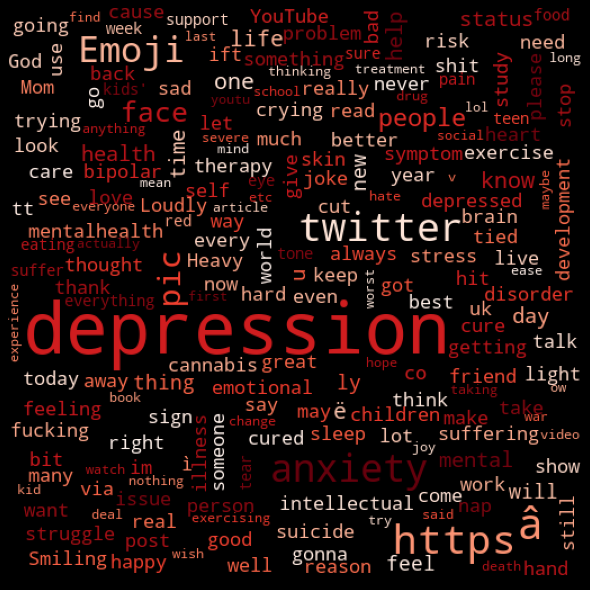

In [66]:
depressive_words = ' '.join(list(df[df['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Reds").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

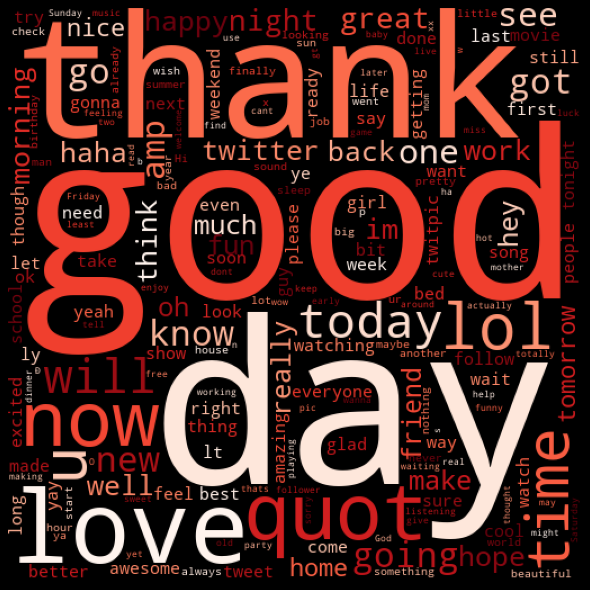

In [67]:
positive_words = ' '.join(list(df[df['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Reds").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,df['label'],test_size=0.25,random_state=42)

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [70]:
X_train_vect.shape

(7735, 15000)

In [71]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(11978, 15000)
(11978,)


### APPLYING LOGISTIC REGRESSION MODEL 

In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)

LogisticRegression()

### CLASSIFICATION REPORT FOR CHECKING THE ACCURACY

In [73]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2011
           1       0.99      0.96      0.98      2011

    accuracy                           0.98      4022
   macro avg       0.98      0.98      0.98      4022
weighted avg       0.98      0.98      0.98      4022



### APPLYING NAIVE BAYES MULTINOMIALNB MODEL 

In [74]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_resample,y_resample)

MultinomialNB()

### CLASSIFICATION REPORT FOR CHECKING THE ACCURACY OF NAIVE BAYES MODEL

In [75]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = mnb.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2011
           1       0.96      0.96      0.96      2011

    accuracy                           0.96      4022
   macro avg       0.96      0.96      0.96      4022
weighted avg       0.96      0.96      0.96      4022



### FOR TAKING USER INPUT AND PREDICTION

In [76]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [wo.lemmatize(word) for word in a ]
    a = ' '.join(a)  
    return a

In [77]:
import re
strr = input('Enter Your Message: ')
print("-------------------------------")
examples = strr

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =mnb.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('Depressive')

-------------------------------
Depressive


In [78]:
import pickle
filename = 'vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

In [79]:
filename = 'prediction.sav'
pickle.dump(mnb, open(filename, 'wb'))

In [80]:
model=pickle.load(open(filename,'rb'))

In [81]:
examples = "Mental pain is less dramatic than physical pain, but it is more common and also more hard to bear. The frequent attempt to conceal mental pain increases the burden: it is easier to say, ‘My tooth is aching’ than to say, ‘My heart is broken."

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =model.predict(example_counts)

In [82]:
prediction

array([1], dtype=int64)